In [1]:
import tqdm
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, writers
from matplotlib.collections import LineCollection

from streamline import Streamlines

import cartopy.crs as ccrs

%matplotlib inline

# Dummy data

In [2]:
lonmin=120
lonmax=160
latmin=20
latmax=45

lonmid=(lonmin+lonmax)*0.5
latmid=(latmin+latmax)*0.5

Y, X = np.mgrid[latmin:latmax:100j, lonmin:lonmax:100j]

xx=(X-lonmid)/(lonmax-lonmin)*2.*3.
yy=(Y-latmid)/(latmax-latmin)*2.*3.


U, V = 1 + xx**2 - yy, -1 - xx + xx*yy**2
#speed = np.sqrt(U*U + V*V)

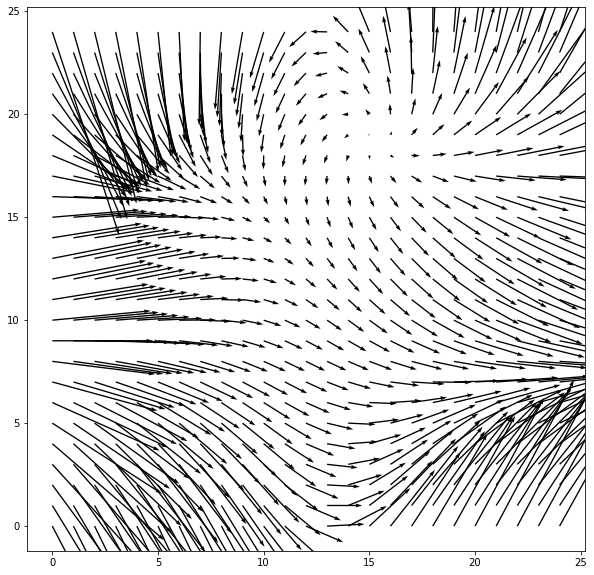

In [3]:
plt.figure(figsize=(10,10))
plt.quiver(U[::4,::4],V[::4,::4],scale=60)

# Make Animation

56it [01:28,  1.58s/it]                        


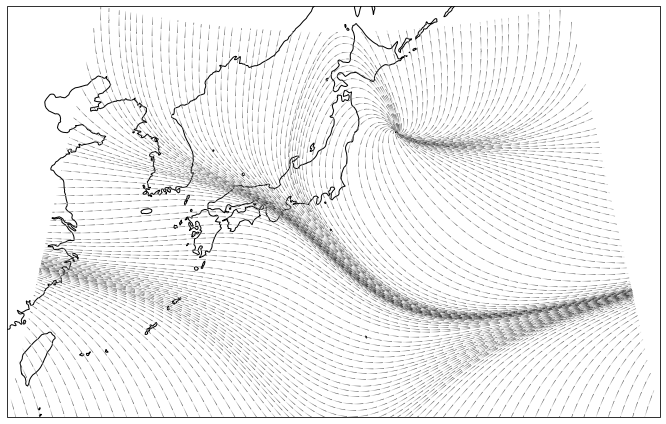

In [4]:
fig = plt.figure(figsize=(10,6))
ax = plt.subplot(1, 1, 1, projection=ccrs.LambertConformal(central_longitude=lonmid, central_latitude=latmid))
ax.coastlines()

lengths = []
colors = []
lines = []
proj=ccrs.PlateCarree()

s = Streamlines(X, Y, U, V)
for streamline in s.streamlines:
    x, y = streamline
    #test=proj.transform_points(x=np.array(x),y=np.array(y),src_crs=proj)
    points = np.array([x,y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    n = len(segments)
    
    D = np.sqrt(((points[1:] - points[:-1])**2).sum(axis=-1))
    L = D.cumsum().reshape(n,1) + np.random.uniform(0,1)
    C = np.zeros((n,3))
    C[::-1] = (L*1.5) % 1

    line = LineCollection(segments, color=C, linewidth=0.5,transform=ccrs.PlateCarree())
    lengths.append(L)
    colors.append(C)
    lines.append(line)
    
    ax.add_collection(line)

def update(frame_no):
    for i in range(len(lines)):
        lengths[i] += 0.05
        colors[i][::-1] = (lengths[i]*1.5) % 1
        lines[i].set_color(colors[i])
    pbar.update()

ax.set_extent([lonmin,lonmax,latmin,latmax])
fig.tight_layout()

n = 27

animation = FuncAnimation(fig, update, frames=n, interval=20)
pbar = tqdm.tqdm(total=n)
animation.save('wind.mp4', writer='ffmpeg', fps=60)
animation.save('wind.gif', writer='imagemagick', fps=30)
pbar.close()

# Dislay animated gif

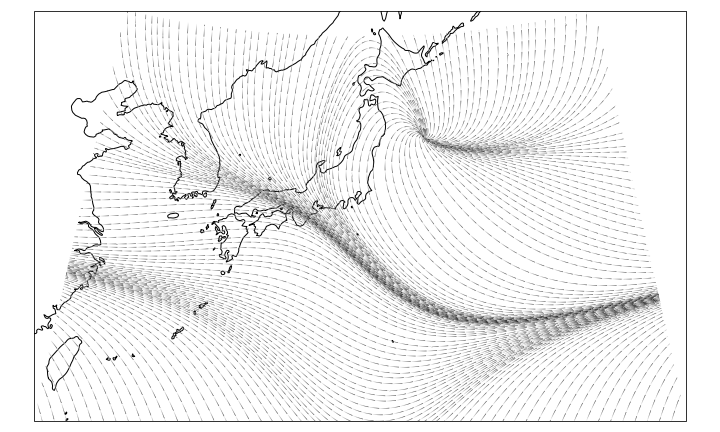

In [10]:
from IPython.display import Image
with open('wind.gif','rb') as file:
    display(Image(file.read()))